# 퍼셉트론
- iris data로 구현

In [33]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

iris = load_iris()
print(iris.feature_names)
X = iris['data'][:,(2,3)] # 꽃잎의 길이와 너비
y = (iris['target']==0).astype(np.int8) # Iris Setosa인지

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
print(y_pred)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0]


# 다층 퍼셉트론 MLP
- 은닉층의 가중치를 랜덤하게 초기화 하는 것이 중요!
    - IF 모두 0으로 초기화했다면 모든 뉴런이 완전히 같아짐
    - 역전파단계에서 각 뉴런이 오차에 얼마나 기여했는지에 따라 업데이트하므로
    - 같은 값으로 초기화한다면 모델은 하나의 뉴런이 있는 것처럼 동작할것임<br/><br/>
- 활성화함수 계단함수 -> 시그모이드
    - 기존의 퍼셉트론의 활성화함수 계단함수로는 역전파를 계산할 수 없음(미분 불능)<br/><br/>
- 활성화 함수의 중요성!
    - 퍼셉트론은 선형함수 + 활성화 함수임
    - 선형함수가 아무리 달라도 선형함수->선형함수 = 선형함수임
    - 비선형성(활성화 함수)를 추가 함으로써 어떠한 연속함수라도 근사할 수 있음

# fashion_mnist데이터로 MLP 구현 \<Tensorflow>

In [4]:
#%pip install -U tensorflow
#%pip install -U tensorflow-gpu

import tensorflow as tf
from tensorflow import keras

# 데이터셋 적재
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full , y_train_full) , (X_test , y_test) = fashion_mnist.load_data()

In [5]:
# 정규화 값을 0 ~ 1사이로 맞추기
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

# 클래스 이름 리스트 정의
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

두개의 은닉층으로 이루어진 MLP

In [124]:
'''
    해당 코드와 아래의 model은 완전 동일 함
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # input_shape는 배치크기를 제외하고 샘플의 크기
model.add(keras.layers.Dense(300,activation='relu',use_bias=True))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) #마지막 층은 출력층으로 10개의 라벨중 하나로 예측해야하므로 softmax

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 히든레이어 Dense(300)
# 235500 = 784*300 + 300
hidden1 = model.layers[1]
weight , biases = hidden1.get_weights()
print("weight의 shape : {}".format(weight.shape))
print("biases의 shape : {}".format(biases.shape))
print("레이어 파라미터 개수 : {} + {} = {}".format(len(weight.reshape(-1,1)),len(biases),len(weight.reshape(-1,1))+len(biases)))

weight의 shape : (784, 300)
biases의 shape : (300,)
레이어 파라미터 개수 : 235200 + 300 = 235500


현재는 weight와 biases가 랜덤으로 초기화 되있음

Compile : 모델 생성 후 사용할 손실함수와 옵티마이저를 지정해야한다.

- 손실함수 : 현재 y-label은 10개로 10개중 하나로 맞추는 모델임
    - 각 클래스는 서로 배타적이다.
    - 현재는 0~9를 예측해야 하므로 sparse_categorical_crossentropy
        - 만약 확률을 예측해야한다면 categorical_crossentropy ex)[0,0,0,1,0,0,0,0,0,0]    
    

In [8]:
import pandas as pd
len(pd.Series(y_train).unique())

10

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

#모델은 자동으로 갱신됨 , 추가로 학습하고 싶다면
#model.fit(X_train,y_train,epochs=추가 학습할 에포크,validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7331 - accuracy: 0.7602 - val_loss: 0.5345 - val_accuracy: 0.8228
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4924 - accuracy: 0.8276 - val_loss: 0.4868 - val_accuracy: 0.8272
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4463 - accuracy: 0.8437 - val_loss: 0.4095 - val_accuracy: 0.8602
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4181 - accuracy: 0.8526 - val_loss: 0.3896 - val_accuracy: 0.8658
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3986 - accuracy: 0.8603 - val_loss: 0.4015 - val_accuracy: 0.8600
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3826 - accuracy: 0.8646 - val_loss: 0.3836 - val_accuracy: 0.8678
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8697 - val_loss: 0.3864 - val_accuracy:

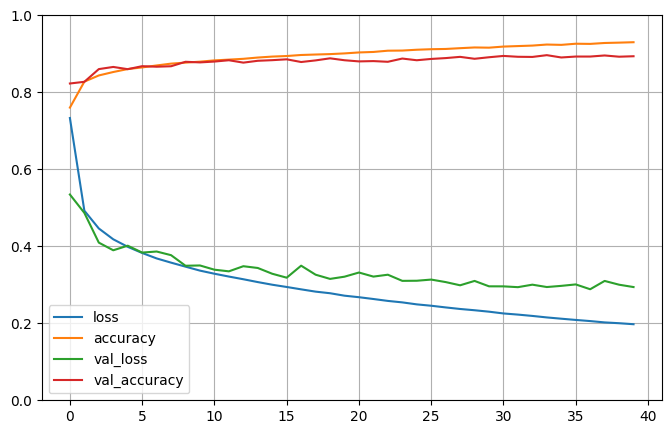

In [11]:
# 시각화 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 0~1사이로 설정 , gca()는 현재 그래프 가져오기
plt.show()

In [19]:
a = pd.DataFrame(history.history)
a.head(2)

,loss,accuracy,val_loss,val_accuracy
0,0.733143,0.760200,0.534466,0.8228
1,0.492441,0.827618,0.486752,0.8272


In [27]:
# 학습한 모델 평가하기
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8835


[0.34407901763916016, 0.8834999799728394]

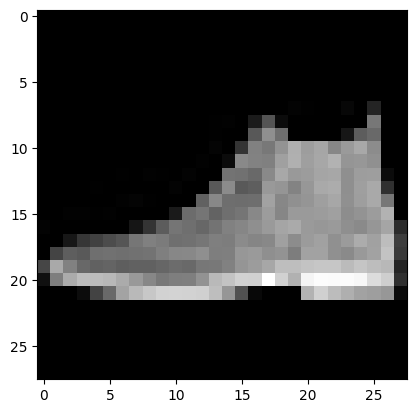

In [116]:
plt.imshow(X_test[0], cmap='gray')

In [117]:
y_pred = model.predict(X_test[0].reshape(-1,28,28))
print(y_pred)
print(y_pred.round(2))
print([class_names[idx] for idx in np.argmax(y_pred,axis=1)])

1/1 [==============================] - 0s 15ms/step
[[2.8500738e-06 3.0683009e-06 7.9630951e-07 9.8287920e-08 1.5421244e-07
  9.7470479e-03 7.1225821e-07 1.1162296e-02 3.0281311e-05 9.7905272e-01]]
[[0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.98]]
['Ankle Boot']


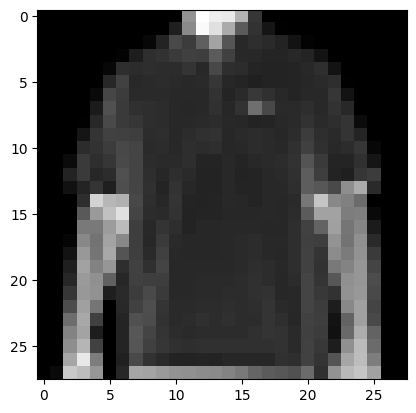

In [119]:
from PIL import ImageOps
image_sample = Image.open('./sample/ch10_나이키셔츠.jpg')
image_sample = image_sample.resize((28,28)).convert('L')
image_sample=ImageOps.invert(image_sample)
image_sample = np.array(image_sample)/255.0
plt.imshow(image_sample, cmap='gray')

흑백 반전이 안되면 가방으로 분류함 ImageOps.invert()을 통해 흑백 반전을 해줘야 한다.

In [121]:
image_sample = np.array(image_sample).reshape(-1,28,28)
y_pred = model.predict(image_sample)
print(y_pred)
print(y_pred.round(2))
print([class_names[idx] for idx in np.argmax(y_pred,axis=1)])

1/1 [==============================] - 0s 14ms/step
[[1.2877344e-02 1.5926108e-03 2.7905864e-01 4.9764034e-03 2.8460616e-01
  7.6334020e-03 3.9570868e-01 1.5747492e-04 1.2706226e-02 6.8300636e-04]]
[[0.01 0.   0.28 0.   0.28 0.01 0.4  0.   0.01 0.  ]]
['Shirt']


# 캘리포니아 주택 가격 MLP

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing = fetch_california_housing()

X_train_full , X_test , y_train_full , y_test = train_test_split(housing.data,housing.target)
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full,y_train_full)

In [3]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

X_train.shape , X_valid.shape , X_test.shape

((11610, 8), (3870, 8), (5160, 8))

모델 설계 : 주택 가격을 예측이 목표!
- 출력층이 하나면 됨
- 잡음이 많으므로 과대적합을 방지하기 위해 은닉층은 하나만

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),     # input.shape는 (데이터 개수 , ~ , ~)일 것이므로
    keras.layers.Dense(1)
])

In [31]:
model.summary()
# 8*30 + 30 + 30*1 + 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7813 - val_loss: 0.5066
Epoch 2/20
363/363 [==============================] - 0s 917us/step - loss: 0.5172 - val_loss: 1.4228
Epoch 3/20
363/363 [==============================] - 0s 881us/step - loss: 0.9839 - val_loss: 2.4296
Epoch 4/20
363/363 [==============================] - 0s 869us/step - loss: 0.4699 - val_loss: 2.6338
Epoch 5/20
363/363 [==============================] - 0s 880us/step - loss: 0.4299 - val_loss: 3.1968
Epoch 6/20
363/363 [==============================] - 0s 901us/step - loss: 0.4221 - val_loss: 3.4145
Epoch 7/20
363/363 [==============================] - 0s 873us/step - loss: 0.4034 - val_loss: 3.7490
Epoch 8/20
363/363 [==============================] - 0s 878us/step - loss: 0.3971 - val_loss: 4.3196
Epoch 9/20
363/363 [==============================] - 0s 873us/step - loss: 0.3916 - val_loss: 4.4572
Epoch 10/20
363/363 [==============================] - 0s 865us/step - loss: 0.3902 

In [34]:
mse_test = model.evaluate(X_test,y_test)
y_pred = model.predict(X_test[:3])              # 새로운 샘플이라고 가정하자 ><

1/1 [==============================] - 0s 68ms/step


In [36]:
mse_test , y_pred

(2.292038679122925,
 array([[2.0180385],
        [3.1496906],
        [3.5254576]], dtype=float32))

## skip connection 또는 residual connection
ResNet 등에서 사용되는 구조로, 이전 층의 출력을 현재 층의 입력에 더하여 정보의 유실을 방지하고, 학습의 안정성을 높이는 효과가 있습니다.

In [41]:
# skip connection

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=output)

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_6[0][0]']          

In [43]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9189 - val_loss: 0.7203
Epoch 2/20
363/363 [==============================] - 0s 935us/step - loss: 0.7839 - val_loss: 0.4445
Epoch 3/20
363/363 [==============================] - 0s 986us/step - loss: 0.4698 - val_loss: 0.4087
Epoch 4/20
363/363 [==============================] - 0s 951us/step - loss: 0.4469 - val_loss: 0.4662
Epoch 5/20
363/363 [==============================] - 0s 959us/step - loss: 0.4303 - val_loss: 0.4511
Epoch 6/20
363/363 [==============================] - 0s 956us/step - loss: 0.4186 - val_loss: 0.5648
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4085 - val_loss: 0.6299
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4163 - val_loss: 0.6736
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4695 - val_loss: 0.8362
Epoch 10/20
363/363 [==============================] - 0s 958us/step - loss: 0.3815 - val_

In [45]:
# base모델보다 loss가 확연히 줄었다.
mse_test

1.5772494077682495

In [61]:
# 입력을 두개로 하는 모델 , 특성 나눈 후 넣기

input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_A)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=output)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 30)           180         ['wide_input[0][0]']             
                                                                                                  
 dense_23 (Dense)               (None, 30)           930         ['dense_22[0][0]']               
                                                                                                  
 concatenate_9 (Concatenate)    (None, 35)           0           ['wide_input[0][0]',             
                                                                  'dense_23[0][0]']         

In [62]:
#model.compile(loss='mean_squared_error',optimizer='sgd')
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A , X_train_B = X_train[:,:5] , X_train[:,2:]
X_valid_A , X_valid_B = X_valid[:,:5] , X_valid[:,2:]
X_test_A , X_test_B = X_test[:,:5] , X_test[:,2:]

# history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))
history = model.fit({'wide_input':X_train_A,'deep_input':X_train_B},y_train,epochs=20,validation_data=({'wide_input':X_valid_A,'deep_input':X_valid_B},y_valid))
mse_test = model.evaluate((X_test_A,X_test_B),y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9475 - val_loss: 0.8147
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7538 - val_loss: 0.7217
Epoch 3/20
363/363 [==============================] - 0s 991us/step - loss: 0.6938 - val_loss: 0.6832
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6612 - val_loss: 0.6544
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6379 - val_loss: 0.6348
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6203 - val_loss: 0.6209
Epoch 7/20
363/363 [==============================] - 0s 987us/step - loss: 0.6083 - val_loss: 0.6095
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5989 - val_loss: 0.6013
Epoch 9/20
363/363 [==============================] - 0s 993us/step - loss: 0.5914 - val_loss: 0.5951
Epoch 10/20
363/363 [==============================] - 0s 986us/step - loss: 0.5858 - val_loss

In [63]:
# 가장 낮은 loss
mse_test

0.6038285493850708

여러 개의 출력
- 예로들어 이미지에서 주요 물체를 분류하는 작업을 할 때 혹은 규제를 목적으로 사용됨
    - 하위 layer가 상위 layer를 그대로 출력하나? 너무 의존하나 확인가능
    - 얼굴사진으로 다중 작업 분류를 할 때
        - 한 출력은 감정 분류
        - 한 출력은 안경의 유무 확인
- 여러개의 출력을 갖고 싶을 때 사용할 수 있다.
- 이때 각 출력은 각자의 손실함수를 가지고 있어야 함!

In [77]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_A)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
aux_output = keras.layers.Dense(1,name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 30)           180         ['wide_input[0][0]']             
                                                                                                  
 dense_33 (Dense)               (None, 30)           930         ['dense_32[0][0]']               
                                                                                                  
 concatenate_14 (Concatenate)   (None, 35)           0           ['wide_input[0][0]',             
                                                                  'dense_33[0][0]']        

In [78]:
# 각 loss에 가중치를 줘야함 , 안주면 1:1 ,규제용으로 보조 출력을 이용한다는 가정하에 aux_output은 가중치를 0.1만 준다.
model.compile(loss=['mse','mse'],optimizer='sgd',loss_weights=[0.9,0.1])

# 출력이 두개이므로 y값도 두개를 전달해야 함.
history = history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=((X_valid_A,X_valid_B),[y_valid,y_valid]))
mse_test = model.evaluate((X_test_A,X_test_B),[y_test,y_test])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8726 - main_output_loss: 0.8161 - aux_output_loss: 1.3807 - val_loss: 0.6126 - val_main_output_loss: 0.6032 - val_aux_output_loss: 0.6973
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5878 - main_output_loss: 0.5804 - aux_output_loss: 0.6550 - val_loss: 0.5756 - val_main_output_loss: 0.5697 - val_aux_output_loss: 0.6285
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5660 - main_output_loss: 0.5610 - aux_output_loss: 0.6107 - val_loss: 0.5627 - val_main_output_loss: 0.5578 - val_aux_output_loss: 0.6064
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - main_output_loss: 0.5490 - aux_output_loss: 0.5892 - val_loss: 0.5482 - val_main_output_loss: 0.5442 - val_aux_output_loss: 0.5842
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5445 - main_output_loss: 0.5412 - aux_output_loss: 0.5737 - val_loss

In [79]:
# total_loss , main_loss , aux_loss
mse_test

[0.586949348449707, 0.587539553642273, 0.5816385746002197]

파이토치와 같이 subclassing으로 모델 만들기

In [150]:
'''
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_A)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
aux_output = keras.layers.Dense(1,name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
'''

class WideDeepModel(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30,activation='relu')
        self.hidden2 = keras.layers.Dense(30,activation='relu')
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):          # 파이토치는 def forward로 선언하는 것이 차이
        input_A , input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output , aux_output

In [151]:
model = WideDeepModel()
model.compile(loss=['mse','mse'],optimizer=keras.optimizers.SGD(learning_rate=1e-3),loss_weights=[0.9,0.1])
history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=5,validation_data=((X_valid_A,X_valid_B),[y_valid,y_valid]))
mse_test = model.evaluate((X_test_A,X_test_B),[y_test,y_test])

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 2.6520 - output_1_loss: 2.5336 - output_2_loss: 3.7181 - val_loss: 1.2616 - val_output_1_loss: 1.1138 - val_output_2_loss: 2.5919
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.1078 - output_1_loss: 0.9873 - output_2_loss: 2.1917 - val_loss: 0.9182 - val_output_1_loss: 0.8183 - val_output_2_loss: 1.8168
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8944 - output_1_loss: 0.8021 - output_2_loss: 1.7246 - val_loss: 0.8027 - val_output_1_loss: 0.7218 - val_output_2_loss: 1.5310
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8082 - output_1_loss: 0.7258 - output_2_loss: 1.5495 - val_loss: 0.7417 - val_output_1_loss: 0.6672 - val_output_2_loss: 1.4120
Epoch 5/5
162/162 [==============================] - 0s 801us/step - loss: 0.7546 - output_1_loss: 0.6735 - output_2_loss: 1.4843


In [152]:
mse_test

[0.7545643448829651, 0.6734825372695923, 1.4842987060546875]

# TF모델 저장 & 로드

In [156]:
# subclassing 방법은 weight만 저장 가능, compiler같은 setting은 저장안됨
model.save_weights('model_weights.h5')
model1 = WideDeepModel()
model1.build(input_shape=[(None, 5), (None, 6)])  # 가중치 생성 , 모델 객체를 만든 후 call 혹은 build 메소드를 호출해야 가중치가 생김
model1.load_weights('model_weights.h5')          # HDF5 파일에서 가중치 로드
try:
    print(model1.optimizer.learning_rate)
except:
    print('응 컴파일러 선언안했어')

응 컴파일러 선언안했어


In [158]:
# 모델 저장 Sequential이나 model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])방식만 됨

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.save('my_keras_model.h5')
model = keras.models.load_model("my_keras_model.h5")
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

콜백(checkpoint)
- 텐서플로는 collback함수를 지원한다.

In [160]:
# 최상의 모델만 저장
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),     # input.shape는 (데이터 개수 , ~ , ~)일 것이므로
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)    # save_best_only옵션은 최상의 valid set에 대해서만 저장함 , 과대적합 걱정x
history = model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 655us/step - loss: 1.9672
Epoch 2/10
363/363 [==============================] - 0s 671us/step - loss: 0.8763
Epoch 3/10
363/363 [==============================] - 0s 666us/step - loss: 0.7937
Epoch 4/10
363/363 [==============================] - 0s 674us/step - loss: 0.7426
Epoch 5/10
363/363 [==============================] - 0s 669us/step - loss: 0.7038
Epoch 6/10
363/363 [==============================] - 0s 652us/step - loss: 0.6727
Epoch 7/10
363/363 [==============================] - 0s 669us/step - loss: 0.6467
Epoch 8/10
363/363 [==============================] - 0s 671us/step - loss: 0.6242
Epoch 9/10
363/363 [==============================] - 0s 669us/step - loss: 0.6047
Epoch 10/10
363/363 [==============================] - 0s 663us/step - loss: 0.5877


In [7]:
# 학습의 진전이 없으면 조기 종료
# callbacks여러개 사용 가능
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),     # input.shape는 (데이터 개수 , ~ , ~)일 것이므로
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)    # save_best_only옵션은 최상의 valid set에 대해서만 저장함 , 과대적합 걱정x
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)    # 일정 에포크(patience)동안 valid set에서 점수가 향상되지 않으면 조기 종료
                                                                                            # restore_best_weights옵션은 훈련이 끝난 후 최상의 가중치를 복원함 
                                                                                            # 즉,model = keras.models.load_model("my_keras_model.h5") 같은 과정이 없어도 됨
                                                                                            
history = model.fit(X_train, y_train, epochs=100,                                           
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])                            # checkpoint_cb을 안해주면 자동으로 저장을 안함
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.1653 - val_loss: 1.0359
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8554 - val_loss: 0.7413
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6845 - val_loss: 0.6690
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6347 - val_loss: 0.6319
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6015 - val_loss: 0.6040
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5754 - val_loss: 0.5807
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5535 - val_loss: 0.5613
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5353 - val_loss: 0.5456
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5194 - val_loss: 0.5323
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5058 - val_lo

In [8]:
# 사용자 정의 callback함수
# 과대적합 방지 : 검증손실/훈련손실 -> 해당 수치가 높아지면 과적합임

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),     # input.shape는 (데이터 개수 , ~ , ~)일 것이므로
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)    # save_best_only옵션은 최상의 valid set에 대해서만 저장함 , 과대적합 걱정x
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)    # 일정 에포크(patience)동안 valid set에서 점수가 향상되지 않으면 조기 종료
                                                                                            # restore_best_weights옵션은 훈련이 끝난 후 최상의 가중치를 복원함 
                                                                                            # 즉,model = keras.models.load_model("my_keras_model.h5") 같은 과정이 없어도 됨
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=100,                                           
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb,val_train_ratio_cb])                            # checkpoint_cb을 안해주면 자동으로 저장을 안함
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
318/363 [=========================>....] - ETA: 0s - loss: 2.3553
val/train: 0.46
363/363 [==============================] - 1s 1ms/step - loss: 2.1717 - val_loss: 0.9937
Epoch 2/100
313/363 [========================>.....] - ETA: 0s - loss: 0.8391
val/train: 0.93
363/363 [==============================] - 0s 905us/step - loss: 0.8320 - val_loss: 0.7749
Epoch 3/100
317/363 [=========================>....] - ETA: 0s - loss: 0.7222
val/train: 1.01
363/363 [==============================] - 0s 923us/step - loss: 0.7199 - val_loss: 0.7298
Epoch 4/100
312/363 [========================>.....] - ETA: 0s - loss: 0.7009
val/train: 1.02
363/363 [==============================] - 0s 935us/step - loss: 0.6865 - val_loss: 0.6987
Epoch 5/100
310/363 [========================>.....] - ETA: 0s - loss: 0.6612
val/train: 1.02
363/363 [==============================] - 0s 911us/step - loss: 0.6588 - val_loss: 0.6721
Epoch 6/100
315/363 [=========================>....] - ETA: 0s - loss: 0.6398

텐서보드 활용하기
- 텐서보드는 루트 디렉토리 밑에 서브 디렉토리들이 존재한다.
    - 서브 디렉토리에 내가 원하는 프로그램의 결과를 저장할 수 있다

In [6]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()
print(run_logdir)

.\my_logs\run_2023_04_16-15_30_22


In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),     # input.shape는 (데이터 개수 , ~ , ~)일 것이므로
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)                        # 텐서보드 callback함수에 결국 디렉토리를 넘겨주는 것임
history = model.fit(X_train, y_train, epochs=30,                                           
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])    

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 3.0835 - val_loss: 0.8493
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7992 - val_loss: 0.5915
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6378 - val_loss: 0.5580
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6067 - val_loss: 0.5346
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5840 - val_loss: 0.5143
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5661 - val_loss: 0.4980
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5505 - val_loss: 0.4830
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5370 - val_loss: 0.4709
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5258 - val_loss: 0.4610
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5160 - val_loss: 0.4536

In [8]:
# 텐서보드는 CMD에서 가상환경 실행 후 tensorboard --logdir=./my_logs --port=6006
# 셸이 tensorboard스크립트를 찾지 못하면 PATH환경변수에 스크립트 설치 경로를 포함시켜야 한다.

In [11]:
# 주피터 노트북으로 텐서보드 실행하기
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [12]:
# Tensorflow 그래프 삭제 및 메모리 해제
# 여러번 모델을 돌렸으므로

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

하이퍼 파라미터 튜닝

In [14]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


# 주택가격 예측 모델이므로 Regressor
# 쉽게 생각해서 model을 wrapper로 감싸서 model의 기능과 sklearn의 모델기능을 모두 사용할 수 있다.

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=3,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_38784\2818905346.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 [==============================] - 1s 1ms/step - loss: 1.2174 - val_loss: 0.8109
Epoch 2/3
363/363 [==============================] - 0s 883us/step - loss: 0.8713 - val_loss: 0.6589
Epoch 3/3
363/363 [==============================] - 0s 874us/step - loss: 0.7063 - val_loss: 0.5145


In [22]:
# 하이퍼 파라미터가 많으므로 랜덤서치!
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)       # k겹 교차검즘을 하므로 랜덤서치에서 valid_set은 안쓰인다.
rnd_search_cv.fit(X_train, y_train, epochs=100,                                                 # 다만 모델의 조기종료에서 사용 될 수 있다.
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.1228 - val_loss: 0.6713
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6426 - val_loss: 0.5442
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5446 - val_loss: 0.4805
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 0.4617
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4538 - val_loss: 0.4665
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4949
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4188 - val_loss: 0.5144
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4085 - val_loss: 0.5277
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3988 - val_loss: 0.5665
Epoch 10/100
242/242 [========

c:\Users\Lenovo\miniconda3\envs\kdt_venv\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.37476625 -0.39725231 -0.44349248 -0.36322306 -0.37891762         nan
         nan         nan -0.38485162 -0.33280574]
  warnings.warn(


363/363 [==============================] - 1s 1ms/step - loss: 0.6314 - val_loss: 0.4924
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4656 - val_loss: 0.8023
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5009 - val_loss: 0.5427
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4119 - val_loss: 0.8682
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7621 - val_loss: 0.5059
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6185 - val_loss: 0.7406
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3523 - val_loss: 0.6361
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3334 - val_loss: 0.5475
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3257 - val_loss: 0.4708
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3113 - val_loss: 0.7001
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001717ACF14B0>,
                   param_distributions={'learning_rate': [0.0007036992892745927,
                                                          0.003638506452865738,
                                                          0.01671140353898045,
                                                          0.008741199405528767,
                                                          0.012309588936393927,
                                                          0.006232868841909281,
                                                          0.0072723434950311555,
                                                          0.014980025679402079,
                                                          0.000947233987395861,
                                                          0.002857400931720...
                                                          0.0003507625445143638,
                                                          0.00744666452597455,
                                                          0.001179829550434225,
                                                          0.021179399650598885,
                                                          0.026256555079231938,
                                                          0.02320888266687079,
                                                          0.002664094880898269,
                                                          0.015893024639660216,
                                                          0.014662906045764888,
                                                          0.0013041339510003749,
                                                          0.013644329634570043, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [24]:
rnd_search_cv.best_params_ , rnd_search_cv.best_score_

({'n_neurons': 75, 'n_hidden': 3, 'learning_rate': 0.021452449765836837},
 -0.33280574282010394)

In [30]:
model = rnd_search_cv.best_estimator_.model
model

In [31]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 75)                675       
                                                                 
 dense_105 (Dense)           (None, 75)                5700      
                                                                 
 dense_106 (Dense)           (None, 75)                5700      
                                                                 
 dense_107 (Dense)           (None, 1)                 76        
                                                                 
Total params: 12,151
Trainable params: 12,151
Non-trainable params: 0
_________________________________________________________________
